In [5]:
pip install pandas scikit-learn seaborn openpyxl


     |████████████████████████████████| 250 kB 9.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/coffeewmilk/Projects/Exxon/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

MER = pd.read_excel('MER.xlsx', sheet_name=[0, 1])
MERT, MERPPL = MER[0], MER[1]

# MER

In [3]:
MERT.isna().all() # nope

MERT = MERT.set_index('MatNo').join(MERPPL.set_index('MatNo')).reset_index().rename(columns={'Points': 'PointPerLitre'})
MERT



,MatNo,Invoicedate,Distributor,GroupId,Type,Provincename,Material Name,New_Volume(L),PointPerLitre
0,145577,2023-09-06,A,ERW_AMBP2020110207,Reseller,Chachoengsao,M SUP Frict Fighter TBS 10W-30 4x7L/CAR,11676,2
1,145577,2023-12-20,A,ERW_AMBP2020110207,Reseller,Chachoengsao,M SUP Frict Fighter TBS 10W-30 4x7L/CAR,5768,2
2,143160,2023-08-11,A,ERW_AMBP2020110207,Reseller,Chachoengsao,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,11088,2
3,143160,2023-03-10,A,ERW_AMBP2020110291,Reseller,Nakhon Ratchasima,MOBIL DELVAC SUPER 1400 15W-40 4X6+1/CAR,2912,2
4,143160,2023-03-10,A,ERW_AMBP2020110291,Reseller,Nakhon Ratchasima,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,7168,2
...,...,...,...,...,...,...,...,...,...
9424,140417,2023-03-11,C,ERW_C08P2020090135,Retails,Lampang,"MOBIL 1 TURBO DIESEL 5W-40, 12X1LT CTN",281,10
9425,140417,2023-07-18,C,ERW_C08P2020090145,Retails,Chiang Mai,"MOBIL 1 TURBO DIESEL 5W-40, 12X1LT CTN",354,10
9426,140635,2023-10-19,C,ERW_C08P2020090203,Retails,Chiang Mai,"MOBIL 1 FS X2 5W50, 12X1L CTN",281,10
9427,140635,2023-11-29,C,ERW_C08P2020090203,Retails,Chiang Mai,"MOBIL 1 FS X2 5W50, 12X1L CTN",162,10


## DISTRIBUTOR

In [4]:
MERDisCount = MERT.groupby('Distributor').count()
MERDisVolume = MERT.groupby('Distributor').sum('New_Volume(L)')

# assuming that new volume is the volume the groupid purchase 
MERT['Point'] = MERT['New_Volume(L)'] * MERT['PointPerLitre']
MERDisPoint = MERT.groupby('Distributor').sum('Point')

MERT

,MatNo,Invoicedate,Distributor,GroupId,Type,Provincename,Material Name,New_Volume(L),PointPerLitre,Point
0,145577,2023-09-06,A,ERW_AMBP2020110207,Reseller,Chachoengsao,M SUP Frict Fighter TBS 10W-30 4x7L/CAR,11676,2,23352
1,145577,2023-12-20,A,ERW_AMBP2020110207,Reseller,Chachoengsao,M SUP Frict Fighter TBS 10W-30 4x7L/CAR,5768,2,11536
2,143160,2023-08-11,A,ERW_AMBP2020110207,Reseller,Chachoengsao,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,11088,2,22176
3,143160,2023-03-10,A,ERW_AMBP2020110291,Reseller,Nakhon Ratchasima,MOBIL DELVAC SUPER 1400 15W-40 4X6+1/CAR,2912,2,5824
4,143160,2023-03-10,A,ERW_AMBP2020110291,Reseller,Nakhon Ratchasima,MOBIL DELVAC SUPER1400 15W-40 4X6+1L/CAR,7168,2,14336
...,...,...,...,...,...,...,...,...,...,...
9424,140417,2023-03-11,C,ERW_C08P2020090135,Retails,Lampang,"MOBIL 1 TURBO DIESEL 5W-40, 12X1LT CTN",281,10,2810
9425,140417,2023-07-18,C,ERW_C08P2020090145,Retails,Chiang Mai,"MOBIL 1 TURBO DIESEL 5W-40, 12X1LT CTN",354,10,3540
9426,140635,2023-10-19,C,ERW_C08P2020090203,Retails,Chiang Mai,"MOBIL 1 FS X2 5W50, 12X1L CTN",281,10,2810
9427,140635,2023-11-29,C,ERW_C08P2020090203,Retails,Chiang Mai,"MOBIL 1 FS X2 5W50, 12X1L CTN",162,10,1620


<Axes: title={'center': 'Total Point per distributor'}, ylabel='Point'>

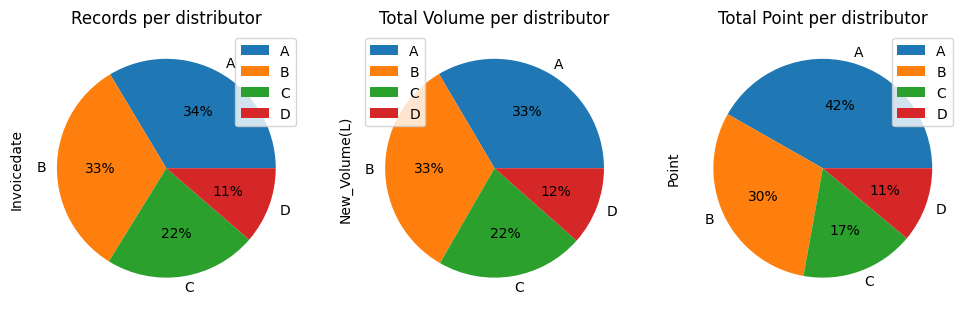

In [102]:
MERDisSub, MERDisy = plt.subplots(1, 3)

MERDisCount.plot.pie(y='Invoicedate', autopct='%1.0f%%',
                    title='Records per distributor',
                    ax=MERDisy[0], figsize=[12, 12])

MERDisVolume.plot.pie(y='New_Volume(L)', autopct='%1.0f%%',
                      title='Total Volume per distributor',
                      ax=MERDisy[1])

MERDisPoint.plot.pie(y='Point', autopct='%1.0f%%',
                      title='Total Point per distributor',
                      ax=MERDisy[2])



Customer of A tend to purches high point reward products?

In [115]:
MERDisPointCount = MERT.groupby(['Distributor', 'PointPerLitre']).count()['Invoicedate'].unstack(level=-1)
MERDisPointPerPPL = MERT.groupby(['Distributor', 'PointPerLitre']).sum('Point')['Point'].unstack(level=-1)
MERDisVolumePerPPL = MERT.groupby(['Distributor', 'PointPerLitre']).sum('New_Volume(L)')['New_Volume(L)'].unstack(level=-1)

<Axes: title={'center': 'Total Volume by PointPerLitre'}, xlabel='Distributor'>

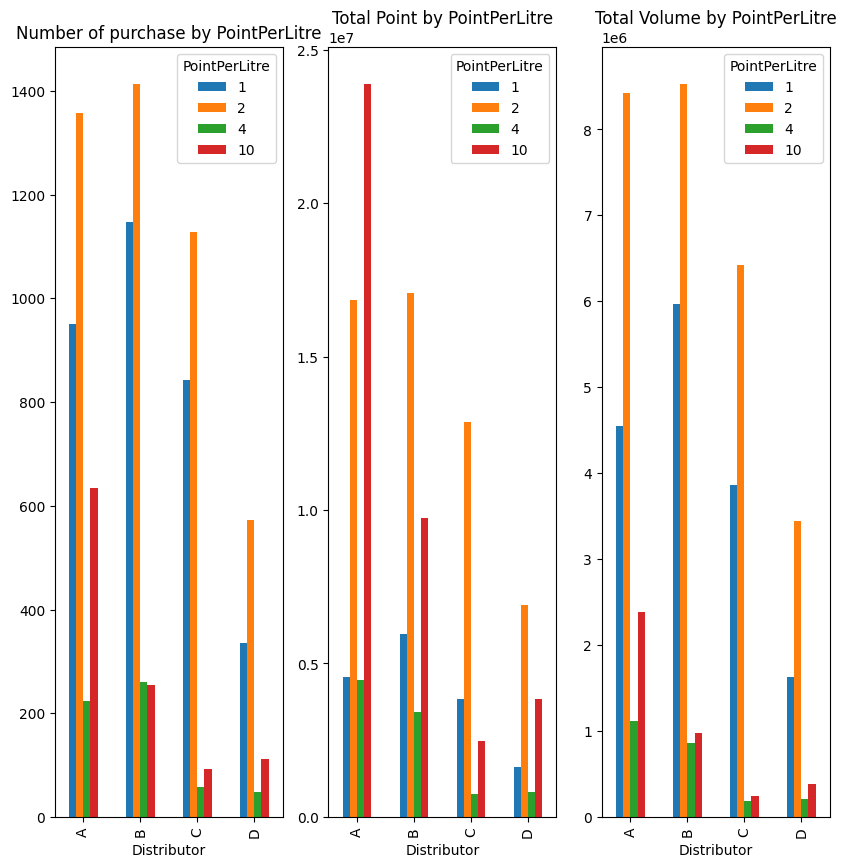

In [117]:
MERDisSubPoint, MERDisPointy = plt.subplots(1, 3)

MERDisPointCount.plot.bar(title='Number of purchase by PointPerLitre', ax=MERDisPointy[0], figsize=[10, 10])
MERDisPointPerPPL.plot.bar(title='Total Point by PointPerLitre', ax=MERDisPointy[1])
MERDisVolumePerPPL.plot.bar(title='Total Volume by PointPerLitre', ax=MERDisPointy[2])

In [205]:
MERDisTypeCount = MERT.groupby(['Distributor', 'Type'])['GroupId'].nunique().unstack(level=-1)
MERDisTypeVolume = MERT.groupby(['Distributor', 'Type'])['New_Volume(L)'].sum().unstack(level=-1)
MERDisTypeVolume



Type,Reseller,Retails
Distributor,,
A,3309284,13167307
B,1987941,14348097
C,2478583,8245843
D,1932554,3735786


<Axes: title={'center': 'Volume by Type'}, xlabel='Distributor'>

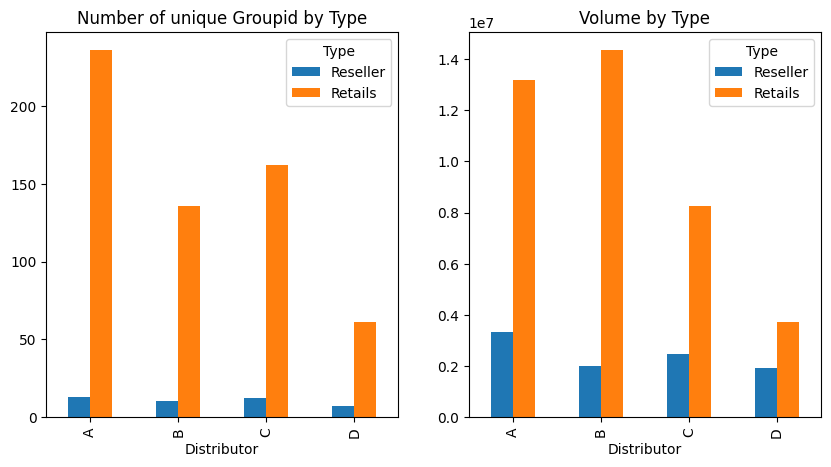

In [207]:
MERDisType, MERDisTypey = plt.subplots(1, 2)

MERDisTypeCount.plot.bar(title='Number of unique Groupid by Type', ax=MERDisTypey[0], figsize=[10, 5])
MERDisTypeVolume.plot.bar(title='Volume by Type', ax=MERDisTypey[1])

The purchase volume of A and B is similar however, A has noticeably more customer (Groupid)?.

Hypothesis: Customer of B Distributor tend to purchase at higher volume than A?


In [122]:
MERDisVolumeStat = MERT.groupby(['Distributor','GroupId'])['New_Volume(L)'].sum().groupby('Distributor').agg(['mean', 'median', 'std'])
MERDisVolumeStat

,mean,median,std
Distributor,,,
A,66171.048193,28260.0,134469.763580
B,111890.671233,52096.0,146165.428231
C,61634.632184,29880.0,100881.180963
D,83357.941176,36904.0,135955.823439


Total Point of the above graph!

In [269]:
pd.set_option('display.max_colwidth', None)
MERDisProvince = MERT.groupby('Distributor')['Provincename'].unique()

### Other possible questions
-   Number of customer(groupid) by Province, volume by Province = how market share is between province that has both distributor
-   Number of purchase by customer(groupid) = how frequency each customer purchase from distisbutor, possibily loyalty?

## GroupId

In [125]:
MERT['GroupId'].unique().max()
MERT['GroupId'].unique().min() # seems alright

'ERW_DYZP2023100001'

In [134]:
MERTGroupVolumeDist = MERT.groupby('GroupId')['New_Volume(L)'].agg(['sum', 'count'])
MERTGroupVolumeDist

,sum,count
GroupId,,
ERW_A1DS2023040002,45304,7
ERW_A1DS2023040003,7420,2
ERW_A1DS2023040005,138141,27
ERW_A1T02022040001,9240,1
ERW_A2JJ2023070001,60716,12
...,...,...
ERW_DGVG2021110003,142090,31
ERW_DJAK2021020001,11816,1
ERW_DLD72021010006,30156,3


<Axes: title={'center': 'Distribution of Number of purchases'}, ylabel='Frequency'>

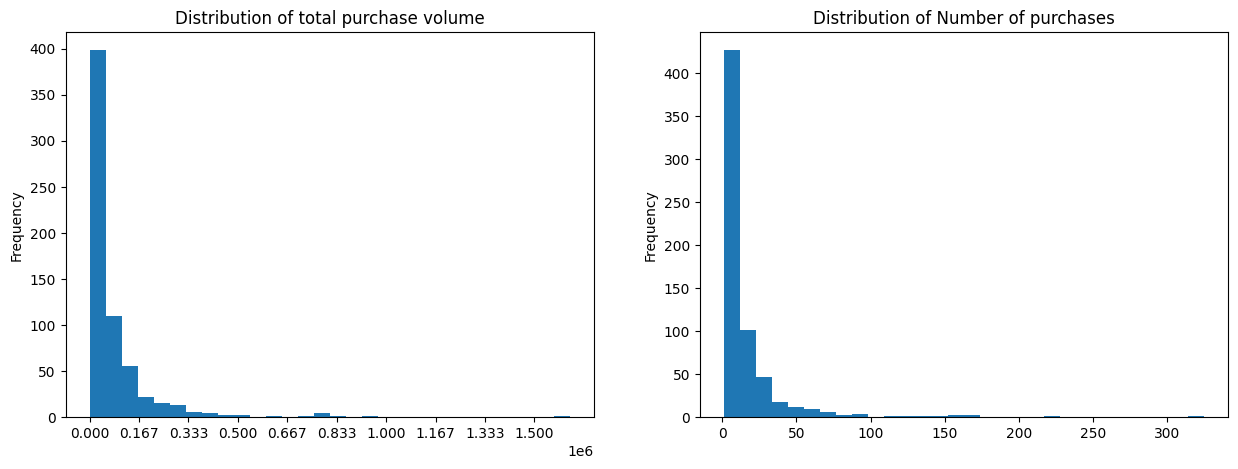

In [266]:
import numpy as np

MERGroupVol, MERGroupVoly = plt.subplots(1, 2)
MERTGroupVolumeDist['sum'].plot.hist(bins=30, title='Distribution of total purchase volume', ax=MERGroupVoly[0], figsize=[15, 5], xticks=np.linspace(0, 1.5e6, 10))
MERTGroupVolumeDist['count'].plot.hist(bins=30, title='Distribution of Number of purchases', ax=MERGroupVoly[1])


Low volume but high frequency? (haven't taken account of type)

In [7]:
MERTGroupPPL = MERT.groupby(['GroupId', 'PointPerLitre'])['New_Volume(L)'].sum() #hypothesis: same groupid tend to b the same product?
MERTGroupPPL = MERTGroupPPL.unstack(-1, fill_value=0).reset_index()

# critiria for dominated product: product that is 2 times more purchases than the rest
MERTGroupPPL['Highest'] = MERTGroupPPL[[1, 2, 4, 10]].apply(lambda row: row.nlargest(1).index[0], axis=1)
MERTGroupPPL['Dominated'] = MERTGroupPPL[[1, 2, 4, 10]].apply(lambda row: row.nlargest(2).values[0] > 2*row.nlargest(2).values[1], axis=1)
MERTGroupPPLDomCount = MERTGroupPPL.groupby('Dominated').count()['GroupId']
MERTGroupPPLDomProd = MERTGroupPPL[MERTGroupPPL['Dominated']].groupby('Highest').count()['GroupId']
MERTGroupPPLDomProd


Highest
1      82
2     350
4      12
10     20
Name: GroupId, dtype: int64

<Axes: title={'center': 'Dominated Product Distribution on customer'}, xlabel='Highest'>

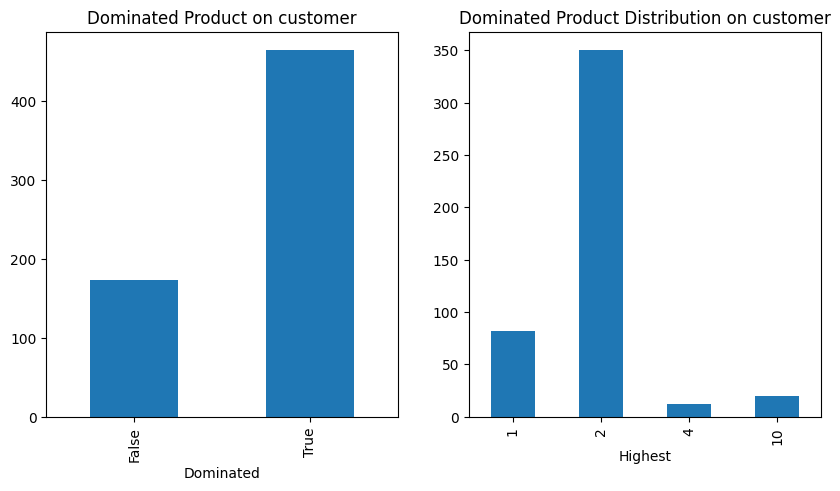

In [8]:
MERGroupPPLDom, MERGroupPPLDomy = plt.subplots(1, 2)
MERTGroupPPLDomCount.plot.bar(title='Dominated Product on customer', ax=MERGroupPPLDomy[0], figsize=[10, 5])
MERTGroupPPLDomProd.plot.bar(title='Dominated Product Distribution on customer', ax=MERGroupPPLDomy[1])

What affect dominated product?

### Other possible questions
-   What kind of product these low volume purchases are?
-   how frequent in term of date?

## Type

In [210]:
MERTypeCount = MERT.groupby('Type')['GroupId'].nunique()
MERTypeVolume = MERT.groupby('Type')['New_Volume(L)'].sum()

Type
Reseller     9708362
Retails     39497033
Name: New_Volume(L), dtype: int64

<Axes: title={'center': 'Volume by type'}, ylabel='New_Volume(L)'>

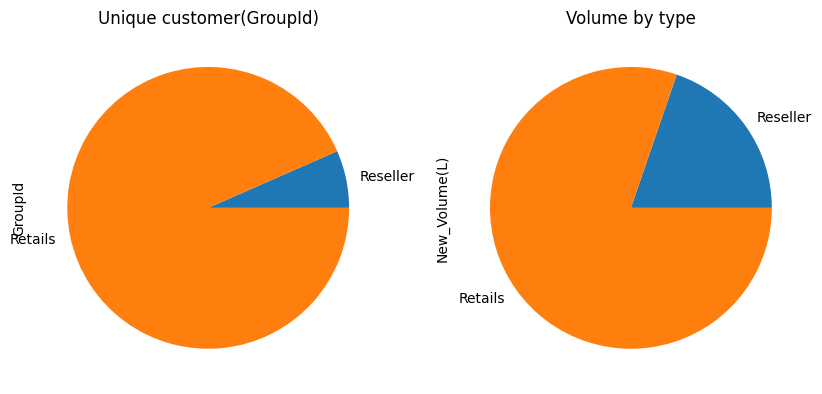

In [212]:
MERType, MERTypey = plt.subplots(1, 2)
MERTypeCount.plot.pie(title = 'Unique customer(GroupId)', ax=MERTypey[0], figsize=[10, 5])
MERTypeVolume.plot.pie(title = 'Volume by type', ax=MERTypey[1])

In [ ]:
#todo: use point

In [218]:
MERTypeResellVolDis = MERT[MERT['Type'] == 'Reseller'].groupby('GroupId')['New_Volume(L)'].sum()
MERTypeRetailVolDis = MERT[MERT['Type'] == 'Retails'].groupby('GroupId')['New_Volume(L)'].sum()


42

<Axes: title={'center': 'Retail volume distribution'}, ylabel='Frequency'>

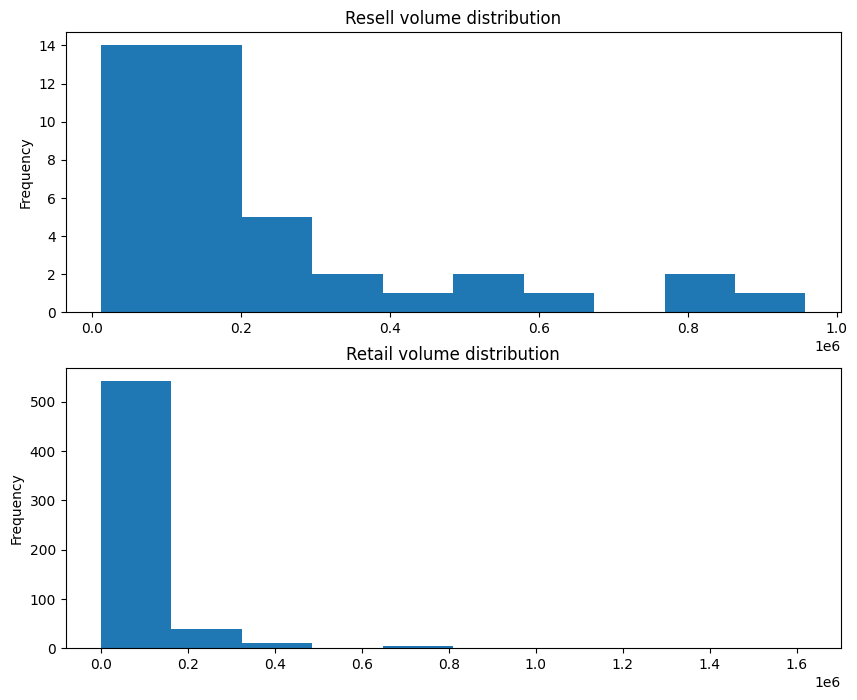

In [225]:
MERTypeVolDis, MERTypeVolDisy = plt.subplots(2, 1)
MERTypeResellVolDis.plot.hist(title='Resell volume distribution', ax=MERTypeVolDisy[0], figsize=[10, 8])
MERTypeRetailVolDis.plot.hist(title='Retail volume distribution', ax=MERTypeVolDisy[1])

Does high volume customer purchase less frequency?

In [238]:
MERTypePPL = MERT.groupby(['Type', 'PointPerLitre'])['New_Volume(L)'].sum().unstack(-1, fill_value=0).transpose()


MERTypePPL

Type,Reseller,Retails
PointPerLitre,,
1,3466895,12550932
2,5081560,21748135
4,460183,1903583
10,699724,3294383


<Axes: title={'center': 'Retail Volume by PPL'}, ylabel='Retails'>

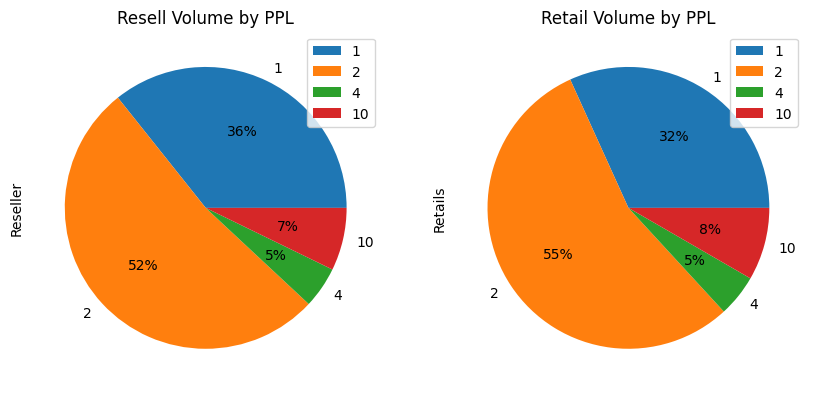

In [242]:
_, MERTypePPLy = plt.subplots(1, 2)
MERTypePPL.plot.pie(y='Reseller', autopct='%1.0f%%', title='Resell Volume by PPL', ax=MERTypePPLy[0], figsize=[10, 10])
MERTypePPL.plot.pie(y='Retails', autopct='%1.0f%%', title='Retail Volume by PPL', ax=MERTypePPLy[1])

### Other possible questions
-   how much area does each reseller and retails cover?
-   Is there a different in term of specific product?

## Province

In [44]:
MERProvCount = MERT.groupby('Provincename')['Invoicedate'].count()
MERProvVol =  MERT.groupby('Provincename')['New_Volume(L)'].sum()
MERProvPoint = MERT.groupby('Provincename')['Point'].sum()

MERProvCountLabelTop = MERProvCount.nlargest(4).index.tolist()
MERProvVolLabelTop = MERProvVol.nlargest(4).index.tolist()
MERProvPointLabelTop = MERProvPoint.nlargest(4).index.tolist()



<Axes: title={'center': 'Point by province'}, ylabel='Point'>

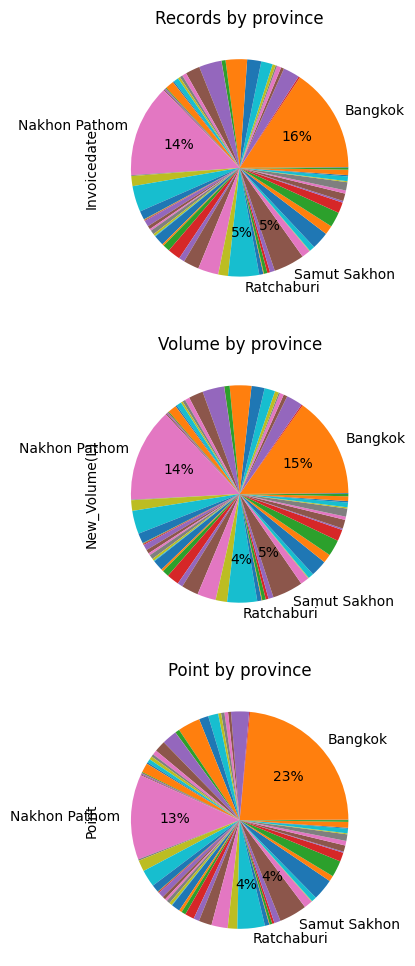

In [42]:
MERProv, MERProvy = plt.subplots(3, 1)

def removePct(pct):
    return ('%1.0f%%' % pct) if pct > 4 else ''

def removeLebel(series):
    top4 = series.nlargest(4).index.tolist()
    return [select if select in top4 else '' for select in series.index]


MERProvCount.plot.pie(autopct=removePct,
                    title='Records by province',
                    ax=MERProvy[0], figsize=[12, 12], labels=removeLebel(MERProvCount))

MERProvVol.plot.pie(autopct=removePct,
                    title='Volume by province',
                    ax=MERProvy[1], figsize=[12, 12], labels=removeLebel(MERProvVol))

MERProvPoint.plot.pie(autopct=removePct,
                    title='Point by province',
                    ax=MERProvy[2], figsize=[12, 12], labels=removeLebel(MERProvPoint))

In [66]:
MERProvCountPPL = MERT.groupby(['Provincename', 'PointPerLitre'])['Invoicedate'].count().unstack(-1, fill_value=0)
MERProvCountPPL['Total'] = MERProvCountPPL[[1, 2, 4, 10]].apply(lambda row: row.sum(), axis=1)
MERProvConntPPLTop = MERProvCountPPL.nlargest(10, 'Total').drop(columns='Total')

MERProvVolPPL = MERT.groupby(['Provincename', 'PointPerLitre'])['New_Volume(L)'].sum().unstack(-1, fill_value=0)
MERProvVolPPL['Total'] = MERProvVolPPL[[1, 2, 4, 10]].apply(lambda row: row.sum(), axis=1)
MERProvVolPPLTop = MERProvVolPPL.nlargest(10, 'Total').drop(columns='Total')

MERProvPointPPL = MERT.groupby(['Provincename', 'PointPerLitre'])['Point'].sum().unstack(-1, fill_value=0)
MERProvPointPPL['Total'] = MERProvPointPPL[[1, 2, 4, 10]].apply(lambda row: row.sum(), axis=1)
MERProvPointPPLTop = MERProvPointPPL.nlargest(10, 'Total').drop(columns='Total')



<Axes: title={'center': 'Point by province'}, xlabel='Provincename'>

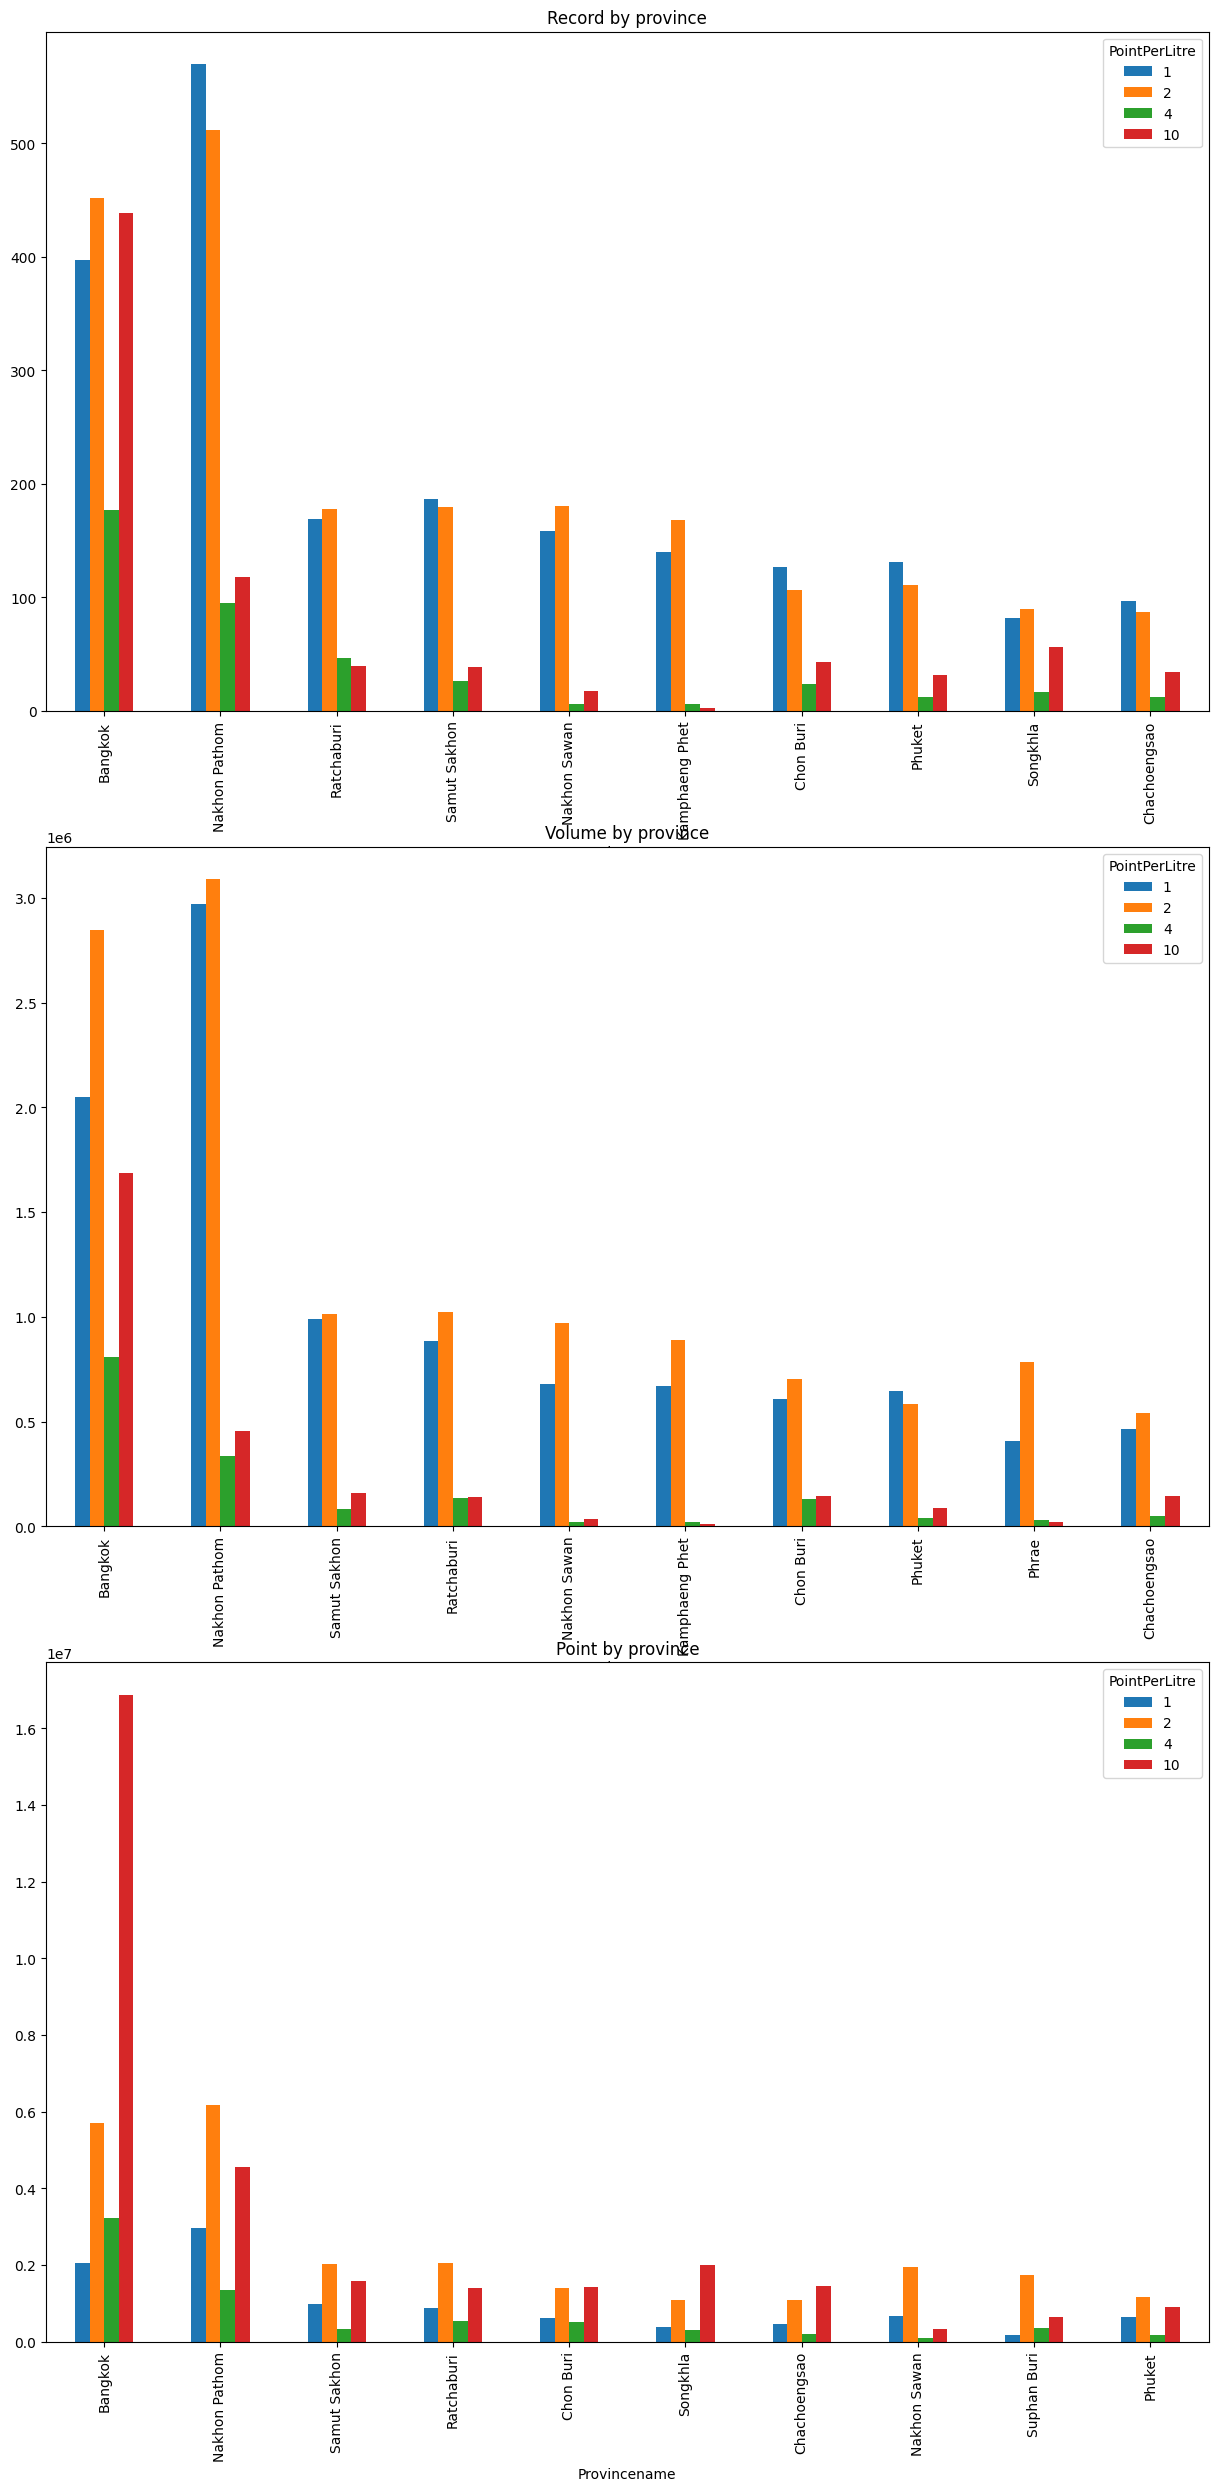

In [70]:
MERProvVol, MERProvVoly = plt.subplots(3, 1)

MERProvConntPPLTop.plot.bar(title='Record by province', ax=MERProvVoly[0], figsize=[15, 30])
MERProvVolPPLTop.plot.bar(title='Volume by province', ax=MERProvVoly[1])
MERProvPointPPLTop.plot.bar(title='Point by province', ax=MERProvVoly[2])